In [15]:

# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [16]:
# LOADING THE HEART DATASET


In [17]:
heart_df = pd.read_csv('/content/heart.csv')
heart_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [18]:
# CLEANING THE HEART DATASET

In [19]:
def clean_dataset(df):
    df = df.dropna()  # Remove rows with missing values
    if df.isnull().sum().sum() > 0:
        df = df.fillna(df.mean())  # Impute remaining missing values if any
    return df
heart_df = clean_dataset(heart_df)
heart_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [20]:
# PERFORMING EDA ON HEART DATASET

In [21]:
def perform_eda(df, dataset_name):
    print(f"EDA for {dataset_name} dataset")
    print("-" * 40)
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing Values:\n", df.isnull().sum())
    print("Summary Statistics:\n", df.describe())
    print("Class Distribution (if classification target exists):")
    if 'Outcome' in df.columns:
        print(df['Outcome'].value_counts())
    elif 'target' in df.columns:
        print(df['target'].value_counts())
    elif 'status' in df.columns:
        print(df['status'].value_counts())
    print("\n")

perform_eda(heart_df, "Heart Disease")

EDA for Heart Disease dataset
----------------------------------------
Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Summary Statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.

EDA for Heart Disease dataset
----------------------------------------
Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Summary Statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.

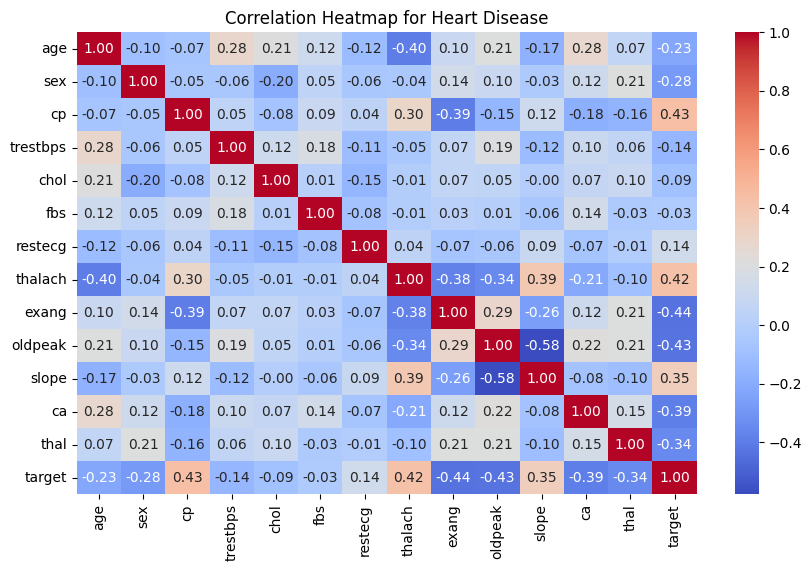

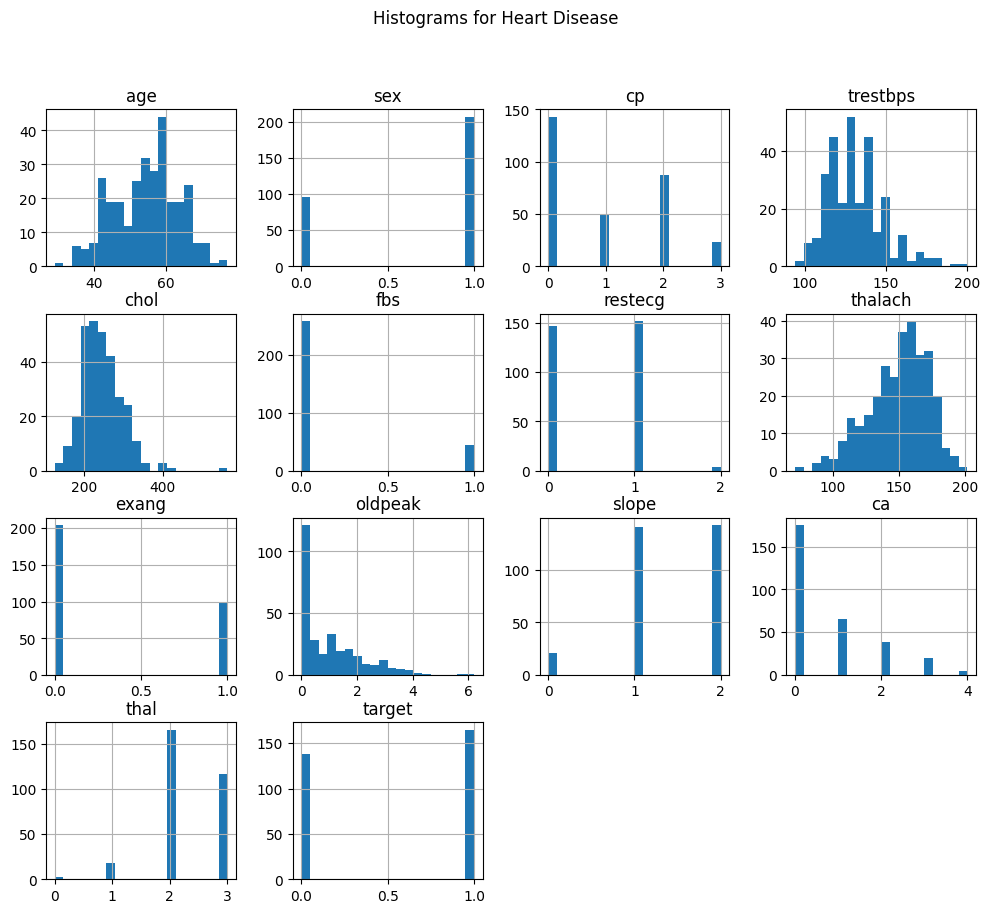

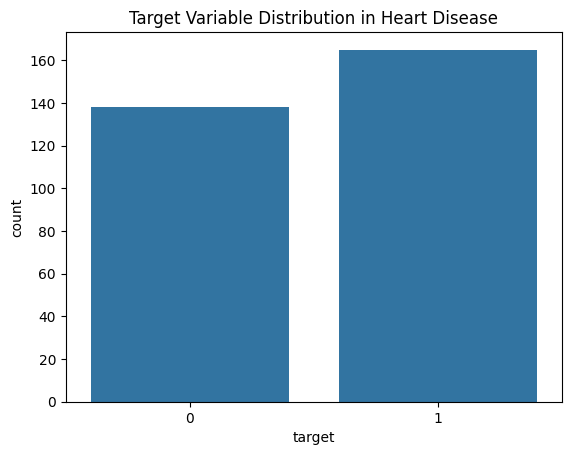

In [22]:
# PERFORM EDA
def perform_eda(df, dataset_name):
    print(f"EDA for {dataset_name} dataset")
    print("-" * 40)
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing Values:\n", df.isnull().sum())
    print("Summary Statistics:\n", df.describe(include='all'))
    print("Class Distribution (if classification target exists):")
    if 'Outcome' in df.columns:
        print(df['Outcome'].value_counts())
    elif 'target' in df.columns:
        print(df['target'].value_counts())
    elif 'status' in df.columns:
        print(df['status'].value_counts())
    print("\n")

    # Generate graphs
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_columns.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f", cmap="coolwarm")
        plt.title(f"Correlation Heatmap for {dataset_name}")
        plt.show()

        numeric_columns.hist(figsize=(12, 10), bins=20)
        plt.suptitle(f"Histograms for {dataset_name}")
        plt.show()

    if 'Outcome' in df.columns or 'target' in df.columns or 'status' in df.columns:
        target_column = 'Outcome' if 'Outcome' in df.columns else 'target' if 'target' in df.columns else 'status'
        sns.countplot(x=target_column, data=df)
        plt.title(f"Target Variable Distribution in {dataset_name}")
        plt.show()
perform_eda(heart_df, "Heart Disease")

In [23]:
# SPLITTING,TRAINING,VALIDATION AND TESTING FOR THE  DATASET

In [24]:
# Split datasets into training, validation, and test sets

def split_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [25]:
 #Assuming the target columns are known
from sklearn.model_selection import train_test_split # Import train_test_split if you haven't already


heart_splits = split_data(heart_df, 'target')  # Make sure heart_df is also defined and loaded


In [26]:
# Print split shapes
for name, splits in zip(["Heart Disease"],
                        [ heart_splits]):
    X_train, X_val, X_test, y_train, y_val, y_test = splits
    print(f"{name} dataset:")
    print("Train set:", X_train.shape, y_train.shape)
    print("Validation set:", X_val.shape, y_val.shape)
    print("Test set:", X_test.shape, y_test.shape)
    print()

Heart Disease dataset:
Train set: (212, 13) (212,)
Validation set: (45, 13) (45,)
Test set: (46, 13) (46,)



In [27]:
#TRAINING AN HEART DISESASE

In [28]:
data = pd.read_csv("/content/heart.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# Split data into features (X) and target (y)
X = data.drop(columns=['target'])  # 'target' is the column with labels
y = data['target']  # 'target' column is the label (1: Disease, 0: No Disease)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

First 5 Rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       1